In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import seaborn

In [2]:
def t_statistics(sample_mean, pop_mean, std_error):
    numerator = sample_mean - pop_mean
    denomenator = std_error
    return numerator / denomenator

# Q-1

Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet 
has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their 
claims and believe that on average each packet does not contain 500 grams of biryani. 
How do you prove your claim?

In [3]:
pop_mean = 500

 $ H_0 $ = Each packet contains 500 gms of Biriyani (or) the sample is taken from the same distribition
 
 $ H_1 $ = Each packet does't contain 500 gms of Biriyani (or) the sample is taken from diff distribution

In [4]:
np.random.seed(0)
sample_size = 30
n = np.random.randint(low=450,high=550,size=30)
n

array([494, 497, 514, 517, 517, 459, 533, 471, 486, 537, 520, 538, 538,
       462, 508, 515, 489, 537, 496, 538, 531, 487, 475, 527, 522, 459,
       470, 530, 519, 529])

In [5]:
est_pop_std = np.sqrt(np.sum(abs(n-n.mean())**2)/(sample_size-1))
est_pop_std

26.31124491914821

In [6]:
std_error = est_pop_std/np.sqrt(sample_size)
std_error

4.803754119420222

In [7]:
sample_mean = sum(n)/sample_size
sample_mean

507.1666666666667

In [8]:
t = t_statistics(sample_mean, pop_mean, std_error)
t

1.491888737122051

 $ H_0 $:pop_mean = sample_mean 
 
 here we get two situation :
 
 $ H_1 $: pop_mean > sample_mean (or) $ H_1 $: pop_mean < sample_mean 
 therefore it is a two tail t-test

In [9]:
# Two tail T test
confidence_level = 0.99
alpha = 1 - confidence_level
t_critical = stats.t.ppf(1 - alpha/2,sample_size) # Two tailed t statistics for 99% Confidence Level
t_critical

2.7499956535670305

C:\Users\LENOVO\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5930: RuntimeWarning: overflow encountered in power
  Px /= np.sqrt(r*np.pi)*(1+(x**2)/r)**((r+1)/2)


Text(507.1666666666667, 0.0007, 'x_bar')

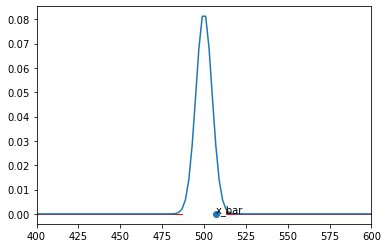

In [10]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 400
x_max = 600


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = est_pop_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = stats.norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = stats.t.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='red')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = stats.norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='red')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))


# conclusion

In [11]:
# Conclusion using Z test
if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


Fail to reject Null Hypothesis


In [12]:
# Here it is two tail so we use |t| > t_critical ------> Reject null hypothesis

In [13]:
# Conclusion using p test
p_value = 2 * (1.0 - stats.norm.cdf(np.abs(t)))
print("p_value = ", p_value)
if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


p_value =  0.13572831576186917
Fail to reject Null Hypothesis


# Q-2

 You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client? 

In [14]:
pop_mean = 4

$ H_0 $ :The sample is taken from the same distribution (or) the average rating is greater than 4

$ H_1 $ : the sample is taken from different distribution (or) the avg rating is not greater than 4

In [15]:
np.random.seed(0)
sample_size = 30
n=np.random.randint(low=3,high=6,size=sample_size)
n

array([3, 4, 3, 4, 4, 5, 3, 5, 3, 3, 3, 5, 4, 5, 5, 3, 4, 4, 4, 4, 3, 4,
       3, 3, 4, 5, 3, 5, 3, 4])

In [16]:
sample_mean= sum(n)/sample_size
sample_mean

3.8333333333333335

In [17]:
est_pop_std = np.sqrt(np.sum(abs(n-sample_mean)**2)/(sample_size-1))
est_pop_std

0.7914775938769181

In [18]:
std_error = est_pop_std/np.sqrt(sample_size)
std_error

0.14450337730876692

In [19]:
t= t_statistics( sample_mean, pop_mean, std_error)
t

-1.1533755803543768

 Here $ H_0 $:Pop_mean > sample_mean
 Here there only one alternative situation that
 
$ H_0 $ :pop_mean < sample_mean
therefore we use one tail t_test (right tail)

In [20]:
# One Tail - Calculating the t-critical value
confidence_level = 0.99
alpha = 1 - confidence_level
t_critical = stats.t.ppf(1 - alpha,sample_size)
print(t_critical)

2.4572615424005697


Text(3.8333333333333335, 0.1, 'x_bar')

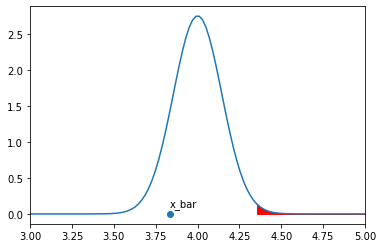

In [21]:
x_min = 3
x_max = 5

mean = pop_mean
std = est_pop_std / (sample_size**0.5)

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = stats.norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical * std)


# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = stats.norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='red')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))


# conclusion

In [22]:
# Conclusion using t test
if(t > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


Fail to reject Null Hypothesis


In [23]:
# Being right tail t_stats > t_critical ----->  Reject null hypothesis

In [24]:
# Conclusion using p test
p_value = 1.0 - stats.norm.cdf(np.abs(t))
print("p_value = ", p_value)
if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


p_value =  0.12437813005233433
Fail to reject Null Hypothesis


# Q-3

 TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre? 

In [25]:
pop_mean = 15

$ H_0 $= The sample is taken from same distribution (or) The average milage is atleast 15kmpl

$ H_1 $= The sample is taken from diff distribution (or) The average milage is not atlest 15 kmpl 

In [26]:
np.random.seed(0)
sample_size = 30
n= np.random.uniform(low=10,high=20,size=sample_size)
n

array([15.48813504, 17.15189366, 16.02763376, 15.44883183, 14.23654799,
       16.45894113, 14.37587211, 18.91773001, 19.63662761, 13.83441519,
       17.91725038, 15.2889492 , 15.68044561, 19.25596638, 10.71036058,
       10.871293  , 10.20218397, 18.32619846, 17.78156751, 18.70012148,
       19.78618342, 17.99158564, 14.61479362, 17.80529176, 11.18274426,
       16.39921021, 11.43353287, 19.44668917, 15.21848322, 14.1466194 ])

In [27]:
est_pop_std = np.sqrt(np.sum(abs(n-n.mean())**2)/(sample_size-1))
est_pop_std

2.849636465252192

In [28]:
std_error = est_pop_std/np.sqrt(sample_size)
std_error

0.520270057569304

In [29]:
sample_mean= sum(n)/sample_size
sample_mean

15.811203282945504

In [30]:
t= t_statistics( sample_mean, pop_mean, std_error)
t

1.5591965579096307

Here $ H_0 $ : Pop_mean >= sample_mean
    
Here there only one alternative situation that

$ H_1 $ :pop_mean < sample_mean
therefore we use one tail t_test (right tail)

In [31]:
# One Tail - Calculating the t-critical value
confidence_level = 0.99
alpha = 1 - confidence_level
t_critical = stats.t.ppf(1 - alpha,sample_size)
print(t_critical)

2.4572615424005697


Text(15.811203282945504, 0.1, 'x_bar')

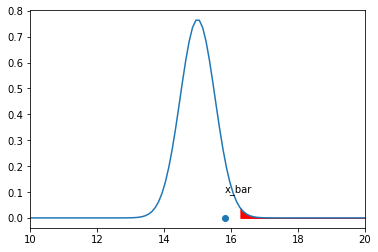

In [32]:
x_min = 10
x_max = 20

mean = pop_mean
std =est_pop_std / (sample_size**0.5)

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = stats.norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)

plt.plot(x, y)

t_critical_right = pop_mean + (t_critical * std)

x1 = np.linspace(t_critical_right, x_max, 100)
y1 = stats.norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='red')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))



# conclusion

In [33]:
if(t > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


Fail to reject Null Hypothesis


In [34]:
# Being right tail t_stats > t_critical ----> Reject null hypothesis

In [35]:
p_value = 1.0 - stats.t.cdf(np.abs(t),sample_size)

print("p_value = ", p_value)
if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


p_value =  0.06471904648909566
Fail to reject Null Hypothesis


# Q-4

Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim?

In [36]:
pop_mean = 100

$ H_0 $ =The sample is taken from same distribution (or) The application takes less than 100ms to predict

$ H_1 $ =The sample is taken from diff distribution (or) The application takes not less than 100ms to predict

In [37]:
np.random.seed(0)
sample_size = 100
n= np.random.randint(low=95,high=105,size=sample_size)
n

array([100,  95,  98,  98, 102, 104,  98, 100,  97,  99, 102, 101, 103,
       103,  96, 101, 102, 102, 103,  96, 100, 104, 103, 104,  99,  98,
        95,  98, 100,  95,  97,  98, 103,  96,  98,  98,  98, 102,  95,
        96, 104, 104,  95,  99, 102,  98,  97, 102,  97,  95,  95,  99,
       100, 100, 101, 103,  99,  96,  99, 104, 103,  96,  96, 102, 104,
       104,  98, 101, 102,  97,  95,  98, 100, 104,  99,  99, 101,  99,
        99,  98,  99,  99, 103,  99,  98, 102, 100, 100,  95,  96, 100,
       104,  98,  95, 100,  95,  96,  97,  99,  97])

In [38]:
est_pop_std = np.sqrt(np.sum(abs(n-n.mean())**2)/(sample_size-1))
est_pop_std

2.821472500434316

In [39]:
std_error = est_pop_std/np.sqrt(sample_size)
std_error

0.2821472500434316

In [40]:
sample_mean = sum(n)/sample_size
sample_mean

99.33

In [41]:
t= t_statistics( sample_mean, pop_mean, std_error)
t

-2.3746465715929075

Here $ H_0 $ :Pop_mean <= sample_mean
Here there only one alternative situation that

$ H_1 $:pop_mean > sample_mean
therefore we use one tail t_test (left tail)

In [42]:
# One Tail - Calculating the t-critical value
confidence_level = 0.99
alpha = 1 - confidence_level
t_critical = stats.t.ppf(1 - alpha,sample_size)
print(t_critical)

2.3642173659047376


Text(99.33, 0.02, 'x_bar')

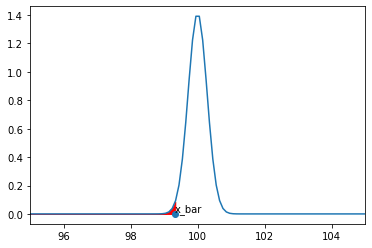

In [43]:
x_min = 95
x_max = 105

mean = pop_mean
std = est_pop_std / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = stats.norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)


plt.plot(x, y)

t_critical_left = pop_mean + (-t_critical * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = stats.norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='red')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.02))


# conclusion

In [44]:
if(t < -t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


Reject Null Hypothesis


In [45]:
# Being left tail t_stats < -t_critical ------> Reject null hypothesis

In [46]:
p_value = 1.0 - stats.t.cdf(np.abs(t),sample_size)

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


p_value =  0.009736909288172502
Reject Null Hypothesis
